In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3><font face = 'Times New Roman'>1. Исходные данные</font></h3>


Загрузим набор данных:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/first_task.csv', header=None)
display(df.head())
print('Shapes: ',df.shape)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,362.495451,261.912010,452.409086,346.583589,454.259111,457.851592,358.655184,320.894829,625.262571,248.611441,...,283.737426,274.342793,381.920269,425.988655,278.903988,440.998550,506.301274,281.887457,268.148068,230.138295
1,631.398467,710.765846,605.316568,1216.133860,1134.422486,564.802756,819.929449,742.284766,509.238808,570.952604,...,342.104231,491.532015,988.080655,535.282993,653.289098,1178.932996,1088.792362,583.098163,711.283520,787.105772
2,281.413007,239.861253,574.897845,334.552514,343.164792,535.038139,276.519075,250.362000,274.697806,292.236369,...,321.063724,312.547334,226.792794,361.505097,490.687675,266.717564,221.932938,284.093587,298.722878,253.425116
3,246.741026,774.327973,533.211943,501.859696,446.271275,552.804659,301.875465,458.305384,479.481328,589.897871,...,413.909437,528.007977,365.941545,326.519927,621.538776,426.009559,263.126396,514.265309,545.742830,507.889405
4,706.856361,691.299675,609.206074,362.399712,787.262660,636.891045,878.911501,866.620990,567.574418,402.611757,...,670.746989,869.709853,821.751524,624.395534,307.567076,642.629935,667.865726,538.187006,706.410774,652.486298


Shapes:  (10, 1000)


<font size="4" face = 'Times New Roman'>
Судя по результату метода <strong>head()</strong>, файл с данными имеет следующую структуру: <br>
    <ul>
    <li>Строки - № задания (i = 1, 2, ...)</li>
    <li>Стобцы - № студента (j = 1, 2, ...)</li>
    <li>Ячейки - время выполнения i-го задания j-м студентом</li>
    </ul>
</font>

<font size="4" face = 'Times New Roman'>Транспонируем данные для удобства обработки</font>

In [ ]:
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9
0,362.495451,631.398467,281.413007,246.741026,706.856361,1400.250476,569.530312,748.308126,566.932393,602.551469
1,261.912010,710.765846,239.861253,774.327973,691.299675,1558.808482,351.989841,1187.227164,280.782629,321.303545
2,452.409086,605.316568,574.897845,533.211943,609.206074,2159.848391,201.780903,554.533211,282.885275,436.671619
3,346.583589,1216.133860,334.552514,501.859696,362.399712,1905.817175,430.995262,313.674779,274.613090,455.943324
4,454.259111,1134.422486,343.164792,446.271275,787.262660,1230.104503,321.084511,1157.835703,260.521006,408.721661


<h3><font face = 'Times New Roman'>2. Распределение времени решения заданий</font></h3>

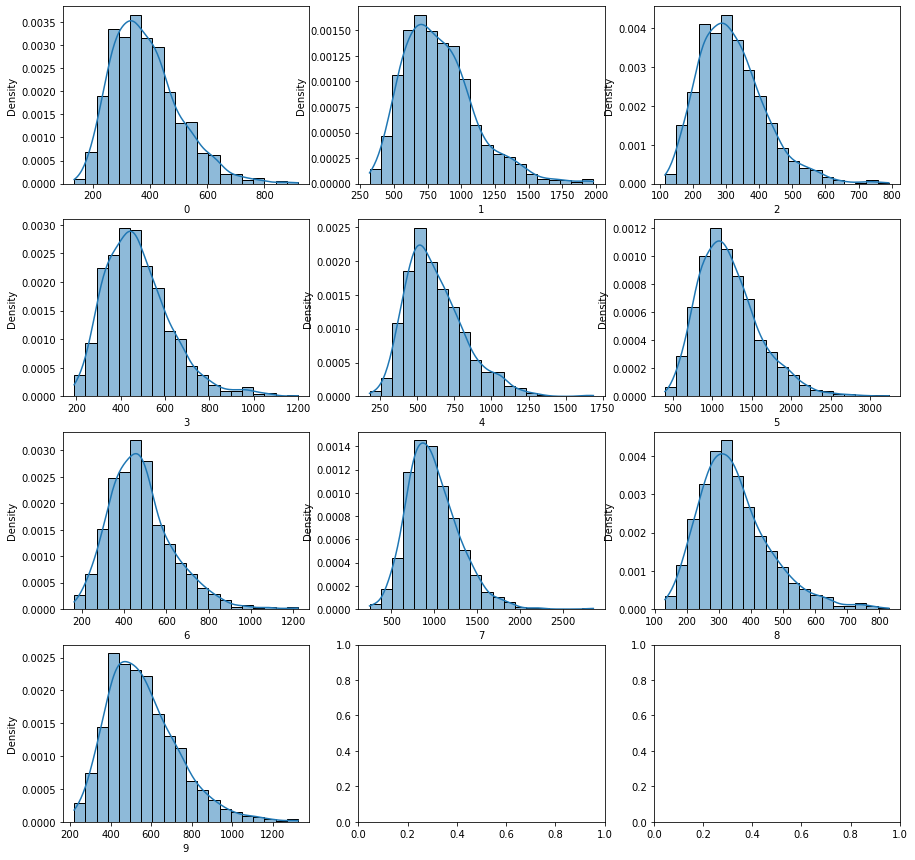

In [ ]:
#df.hist(figsize=(20, 20), bins = 25);
fig, ax = plt.subplots(4, 3, figsize = (15, 15))
n = len(df.columns.tolist())
cols = 0
for i in range(0, 4):
    for j in range(0, 3):
        if (cols < n):
            sns.histplot(df.iloc[:, cols], stat='density', common_bins= False, common_norm= False, kde = True, ax = ax[i][j], bins = 20)
        cols += 1
plt.savefig('distrib.png')

<div><font size="4" face = 'Times New Roman'>Построим гистграммы распределения времени по каждому из заданий:</font>
<img src='https://github.com/JacKira/SDO/blob/main/distrib.png?raw=1' style = "width:70%; height:70%; padding:0; border:0" hspace = "0" vspace="0"></div>

<font size="3" face = 'Times New Roman'>Можно заметить, что большинство распределений по форме напоминают распределение хи-квадрат Пирсона.</font>

<h3><font  face = 'Times New Roman'>3. Проверяемая гипотеза</font></h3>
<font size="4" face = 'Times New Roman'>Так как все задания имеют схожие распределения, исследуем гипотезы на задании 0.<br>
По классической схеме, выдвенем нулевую гипотезу <font size = "5">H</font>0 и альтернативную <font size = "5">H</font>1: <br>
    <ul>
    <li><font size = "5">H</font>0: Время выполнения задания 0 имеет принадлежность к закону распределния Хи - квадрат -Пирсона.</li>
    <li><font size = "5">H</font>1: Распределение времени отлично от закона распределения  Хи - квадрат -Пирсона.</li>
    </ul>

И сразу же установим уровень значимости $\alpha=0.05$
<font>

<h3><font  face = 'Times New Roman'>4. Проверка гипотезы</font></h3>

<p style = "text-align:justify; margin-left:5%; margin-right:5%"><font size="4" face = 'Times New Roman'>Чтобы проверить данную гипотезу можно воспользоватья критерием согласия хи-квадрат. При этом, так как мы проверяем сложную гипотезу (хотим проверить принадлежность к целому классу распределений), то нам необходимо сначала оценить параметры данного распределения. Сделаем это с помощью метода максимального правдоподобия (теоретически доказано, что это лучший способ оценки параметров для таких задач) по таблице частотности.  <br>
Составим таблицу частотности - разобьем выборку по заданию  на 10 интервалов (воспользуемся 10-ю последовательными квантилями), а затем посчитаем частоты попадания в каждый интервал:
</font>
</p>

In [ ]:
df_results = pd.DataFrame({'Distribution':[], 'difference_p_value':[]})
df_results.Distribution = df_results.Distribution.astype(object)
df_results.difference_p_value = df_results.difference_p_value.astype(float)

In [ ]:
# Разбиваем на интервалы
task_number = 0 # Номер задания, для которого проверяем гипотезу
intervals = [df[task_number].min()]
x_ = [0.]
for q in np.arange(0.1, 1, 0.1):
    intervals.append(round(np.quantile(df[task_number], q), 0))
    x_.append(q)
intervals.append(df[task_number].max())
x_.append(1.)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.


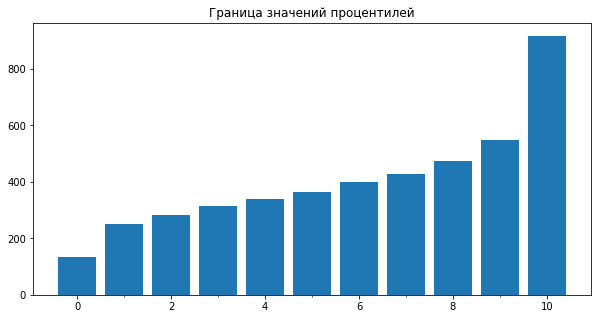

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
labls = ("% ".join(list(map(str,np.round(np.arange(0, 1.1, 0.1) * 100, 2))))).split(' ')
plt.bar(np.arange(0, len(labls)), height = intervals) # Полученные границы интервалов
ax.set_xticks(np.arange(0, len(labls)), labls)
ax.set_title('Граница значений процентилей')
plt.show()

In [ ]:
# Сотавляем вектор наблюдений (таблица частотности)
observations = []
for i in range(len(intervals) - 1):
    observations.append(len(df[task_number][(df[task_number] >= intervals[i])&(df[task_number] <=intervals[i + 1])]))
observations

[100, 103, 97, 99, 99, 101, 98, 103, 98, 102]

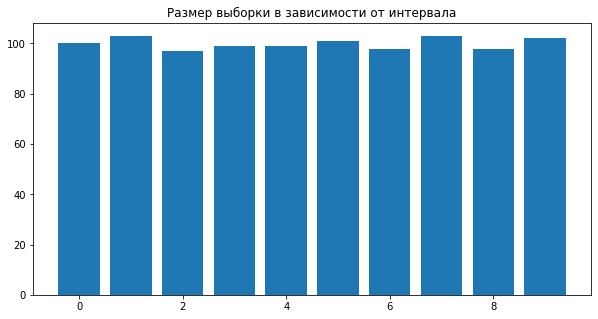

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.bar(np.arange(0, len(observations)), height = observations) 

ax.set_title('Размер выборки в зависимости от интервала')
plt.show()

<h3><font  face = 'Times New Roman'> 5. Получение оценок параметров</font><h3>

<p style = 'text-align:justify'><font size = "4"  face = 'Times New Roman'>
Оценим неизвестные параметры распределения хи-квадрат с помощью ММП (воспользуемся специальной функцией `stats.chi2.fit`):</font>
</p>

In [ ]:
df1, loc1, scale1 = stats.chi2.fit(df[task_number], fdf=10)
print(f'df1 = {df1}, loc1 = {loc1:.4}, scale1 = {scale1:.3}')

df1 = 10, loc1 = 117.4, scale1 = 26.7


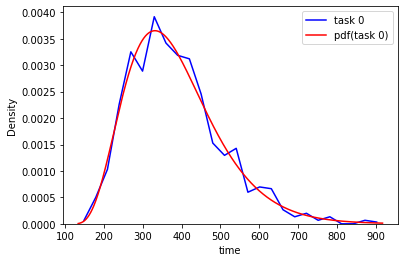

In [ ]:
fig, ax = plt.subplots()

sns.histplot(data=df[task_number], color='b', element='poly', fill=False, stat='density', label='task 0', ax=ax)

chi2_rv1 = stats.chi2(df1, loc1, scale1)
x = np.linspace(min(intervals), max(intervals), 1000)
sns.lineplot(x=x, y=chi2_rv1.pdf(x), color='r', label='pdf(task 0)', ax=ax)
ax.set_xlabel('time');
plt.savefig('est_plot.png')

<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Построим на графике эмпиричускую плотность распреления (наблюдаемую нами) и теоретическую (построенную с использованием оцененных параметров):</font></p>
<div>
<img src='https://github.com/JacKira/SDO/blob/main/est_plot.png?raw=1' style = "width:40%; height:40%; padding:0; border:0" hspace = "0" vspace="0"></div>

<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Видим, что мы довольно хорошо приближаем наблюдаемые значения распределением $\chi^2$ с оцененными параметрами, поэтому вряд ли есть основания отвергать $H_0$.  
Но все равно выполним статистическую проверку гипотезы методом $\chi^2$ - для этого сформируем теоретический вектор частот и воспользуемся функцией (`stats.chisquare`):
</font>
</p>

In [ ]:
# Составляем теоретический вектор частот
n = np.sum(observations)
theory = []
for i in range(len(intervals) - 2):
    p = stats.chi2.cdf(x=intervals[i + 1], df=df1, loc=loc1, scale=scale1) - stats.chi2.cdf(x=intervals[i], df=df1, loc=loc1, scale=scale1)
    theory.append(int(round(p*n, 0)))
p = 1 - stats.chi2.cdf(x=intervals[-2], df=df1, loc=loc1, scale=scale1)
theory.append(n - np.sum(theory))

In [ ]:
# важно, чтобы суммы значений обоих векторов совпадали (иначе функция не заработает)
sum(observations) == sum(theory)

True

In [ ]:
# Проверяем гипотезу
res = stats.chisquare(
    f_obs=observations, 
    f_exp=theory, 
    ddof=2 # не забываем, что мы оценили 2 параметра по выборке
)
df_results=df_results.append({'Distribution':'Хи-квдарат Пирсона', 'difference_p_value':res[1]}, ignore_index = True)
res

Power_divergenceResult(statistic=7.401716536060914, pvalue=0.38828416182152853)

In [ ]:
df_results

,Distribution,difference_p_value
0,Хи-квдарат Пирсона,0.388284


<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Видим, что pvalue $ > \alpha=0.05$ -> у нас нет оснований отвергать $H_0$. Можем сделать вывод о том, что время выполнения задания 0 подчиняется распределению $\chi^2$-Пирсона.</font></p>

### Гамма распределение

<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Получим параметры подходящих гамма-распределений и проверим гипотезу согласия наблюдаемых выборок полученным гамма-распределениям:</font></p>

In [ ]:
alpha = 0.05 # уровень значимости
to_plot = []


intervals = [df[task_number].min()]
for q in np.arange(0.1, 1, 0.1):
    intervals.append(round(np.quantile(df[task_number], q), 0))
intervals.append(df[task_number].max())

# составляем вектор наблюдаемых частот
observations = []
for i in range(len(intervals) - 1):
    observations.append(len(df[task_number][(df[task_number] >= intervals[i]) & (df[task_number] <= intervals[i + 1])]))

# Определяем оценки параметров Гамма-распределения методом ММП
a, loc1, scale1 = stats.gamma.fit(df[task_number])

# Составляем теоретических ветор частот
n = np.sum(observations)
theory = []
for i in range(len(intervals) - 2):
    p = stats.gamma.cdf(x=intervals[i + 1], a=a, loc=loc1, scale=scale1) - stats.gamma.cdf(x=intervals[i], a=a, loc=loc1, scale=scale1)
    theory.append(int(round(p*n, 0)))
p = 1 - stats.gamma.cdf(x=intervals[-2], a=a, loc=loc1, scale=scale1)
theory.append(n - np.sum(theory))

# Проверяем гипотезу
stat, p_value = stats.chisquare(
    f_obs=observations, 
    f_exp=theory,
    ddof=2
)
df_results=df_results.append({'Distribution':'Гамма распределение', 'difference_p_value':p_value}, ignore_index = True)

if p_value > alpha:
    print(f'Для задания {task_number} H0 не отвергнута (p_value = {p_value:.3f})')
    print(f'C параметрами a = {round(a,2)}; loc = {round(loc1,2)}; scale = {round(scale1,2)}')
    to_plot.append(task_number)
else:
    print(f'Для задания {task_number} H0 отвергнута (p_value = {p_value:.3f})')


Для задания 0 H0 не отвергнута (p_value = 0.366)
C параметрами a = 5.55; loc = 107.53; scale = 49.99


<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Видим, что для задания 0 мы можем сделать вывод о том, что распределение времени выполнения задания соответствует закону Гамма-распределению с подобранными параметрами.  <br><br>
Отобразим полученное распределение:
</font>
</p>

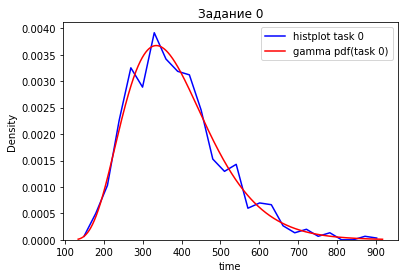

In [ ]:

intervals = [df[task_number].min()]
for q in np.arange(0.1, 1, 0.1):
    intervals.append(round(np.quantile(df[task_number], q), 0))
intervals.append(df[task_number].max())
observations = []
for i in range(len(intervals) - 1):
    observations.append(len(df[task_number][(df[task_number] >= intervals[i]) & (df[task_number] <= intervals[i + 1])]))


a, loc1, scale1 = stats.gamma.fit(df[task_number])
n = np.sum(observations)
theory = []
for i in range(len(intervals) - 2):
    p = stats.gamma.cdf(x=intervals[i + 1], a=a, loc=loc1, scale=scale1) - stats.gamma.cdf(x=intervals[i], a=a, loc=loc1, scale=scale1)
    theory.append(int(round(p*n, 0)))
p = 1 - stats.gamma.cdf(x=intervals[-2], a=a, loc=loc1, scale=scale1)
theory.append(n - np.sum(theory))

fig, ax = plt.subplots()
ax.set_title(f'Задание {task_number}')
sns.histplot(data=df[task_number], color='b', element='poly', fill=False, stat='density', label=f'histplot task {task_number}', ax=ax)

gam = stats.gamma(a, loc1, scale1)
x = np.linspace(min(intervals), max(intervals), 1000)
sns.lineplot(x=x, y=gam.pdf(x), color='r', label=f'gamma pdf(task {task_number})', ax=ax)
ax.set_xlabel('time');
plt.savefig('gamma_est_plot.png')

<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Отобразим полученное распределение:<br>Как видно, подобранное Гамма распределение достаточно хорошо описыват распределение времени выполнения задания 0</font>
<div>
<img src='https://github.com/JacKira/SDO/blob/main/gamma_est_plot.png?raw=1' style = "width:40%; height:40%; padding:0; border:0" hspace = "0" vspace="0"></div></p>

### Лог нормальное

<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Получим параметры подходящих лог - нормальных распределений и проверим гипотезу согласия наблюдаемых выборок полученным лог-нормальным:</font></p>

In [ ]:
alpha = 0.05 # уровень значимости
to_plot = []


intervals = [df[task_number].min()]
for q in np.arange(0.1, 1, 0.1):
    intervals.append(round(np.quantile(df[task_number], q), 0))
intervals.append(df[task_number].max())

# составляем вектор наблюдаемых частот
observations = []
for i in range(len(intervals) - 1):
    observations.append(len(df[task_number][(df[task_number] >= intervals[i]) & (df[task_number] <= intervals[i + 1])]))

# Определяем оценки параметров Гамма-распределения методом ММП
a, loc2, scale2 = stats.lognorm.fit(df[task_number])

# Составляем теоретических ветор частот
n = np.sum(observations)
theory = []
for i in range(len(intervals) - 2):
    p = stats.lognorm.cdf(x=intervals[i + 1], s=a, loc=loc2, scale=scale2) - stats.lognorm.cdf(x=intervals[i], s=a, loc=loc2, scale=scale2)
    theory.append(int(round(p*n, 0)))
p = 1 - stats.lognorm.cdf(x=intervals[-2], s=a, loc=loc2, scale=scale2)
theory.append(n - np.sum(theory))

# Проверяем гипотезу
stat, p_value = stats.chisquare(
    f_obs=observations, 
    f_exp=theory,
    ddof=2
)
df_results=df_results.append({'Distribution':'Лог нормальное', 'difference_p_value':p_value}, ignore_index = True)

if p_value > alpha:
    print(f'Для задания {task_number} H0 не отвергнута (p_value = {p_value:.3f})')
    print(f'C параметрами a = {round(a,2)}; loc = {round(loc1,2)}; scale = {round(scale1,2)}')
    to_plot.append(task_number)
else:
    print(f'Для задания {task_number} H0 отвергнута (p_value = {p_value:.3f})')


Для задания 0 H0 не отвергнута (p_value = 0.355)
C параметрами a = 0.32; loc = 107.53; scale = 49.99


<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Видим, что для задания 0 мы можем сделать вывод о том, что распределение времени выполнения задания соответствует закону Гамма-распределению с подобранными параметрами.  <br><br>
Отобразим полученное распределение:
</font>
</p>

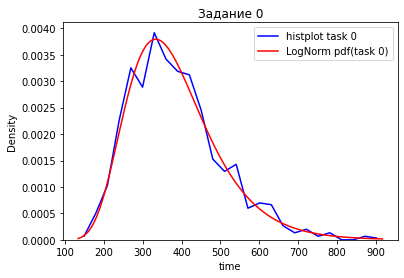

In [ ]:

intervals = [df[task_number].min()]
for q in np.arange(0.1, 1, 0.1):
    intervals.append(round(np.quantile(df[task_number], q), 0))
intervals.append(df[task_number].max())
observations = []
for i in range(len(intervals) - 1):
    observations.append(len(df[task_number][(df[task_number] >= intervals[i]) & (df[task_number] <= intervals[i + 1])]))


# Составляем теоретических ветор частот
n = np.sum(observations)
theory = []
for i in range(len(intervals) - 2):
    p = stats.lognorm.cdf(x=intervals[i + 1], s=a, loc=loc2, scale=scale2) - stats.lognorm.cdf(x=intervals[i], s=a, loc=loc2, scale=scale2)
    theory.append(int(round(p*n, 0)))
p = 1 - stats.lognorm.cdf(x=intervals[-2], s=a, loc=loc2, scale=scale2)
theory.append(n - np.sum(theory))


fig, ax = plt.subplots()
ax.set_title(f'Задание {task_number}')
sns.histplot(data=df[task_number], color='b', element='poly', fill=False, stat='density', label=f'histplot task {task_number}', ax=ax)

lnorm = stats.lognorm(s=a, loc=loc2, scale=scale2)
x = np.linspace(min(intervals), max(intervals), 1000)
sns.lineplot(x=x, y=lnorm.pdf(x), color='r', label=f'LogNorm pdf(task {task_number})', ax=ax)
ax.set_xlabel('time');
plt.savefig('/lognorm_est_plot.png')

<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Отобразим полученное распределение:<br>Как видно, подобранное Гамма распределение достаточно хорошо описыват распределение времени выполнения задания 0</font>
<div>
<img src='lognorm_est_plot.png' style = "width:40%; height:40%; padding:0; border:0" hspace = "0" vspace="0"></div></p>

### Сравнение приближений

<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Если нас интересует, какой закон распределения лучше всего описывает распределение времени выполнения задания, то нужно выбрать распределение с наибольшим p_value, которое характеризует статистическую занчимость отличия одной выборки от другой. <br>То есть если  p_value <= α, то выборки не однородны, иначе однородны, что нам и нужно.</font></p>

In [ ]:
display(df_results.sort_values('difference_p_value', ascending = False))

,Distribution,difference_p_value
0,Хи-квдарат Пирсона,0.388284
1,Гамма распределение,0.365969
2,Лог нормальное,0.355031


<p style = 'text-align:justify'><font size = "3"  face = 'Times New Roman'>Как видно в таблице, Хи - квадрат Пирсона лучше всего описывает распределение времени выполнения задания 0</font></p>